In [2]:
import pandas as pd    ##제목이랑 그래프 타이틀 붙이기
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Volume =  7.206282078590563e-05


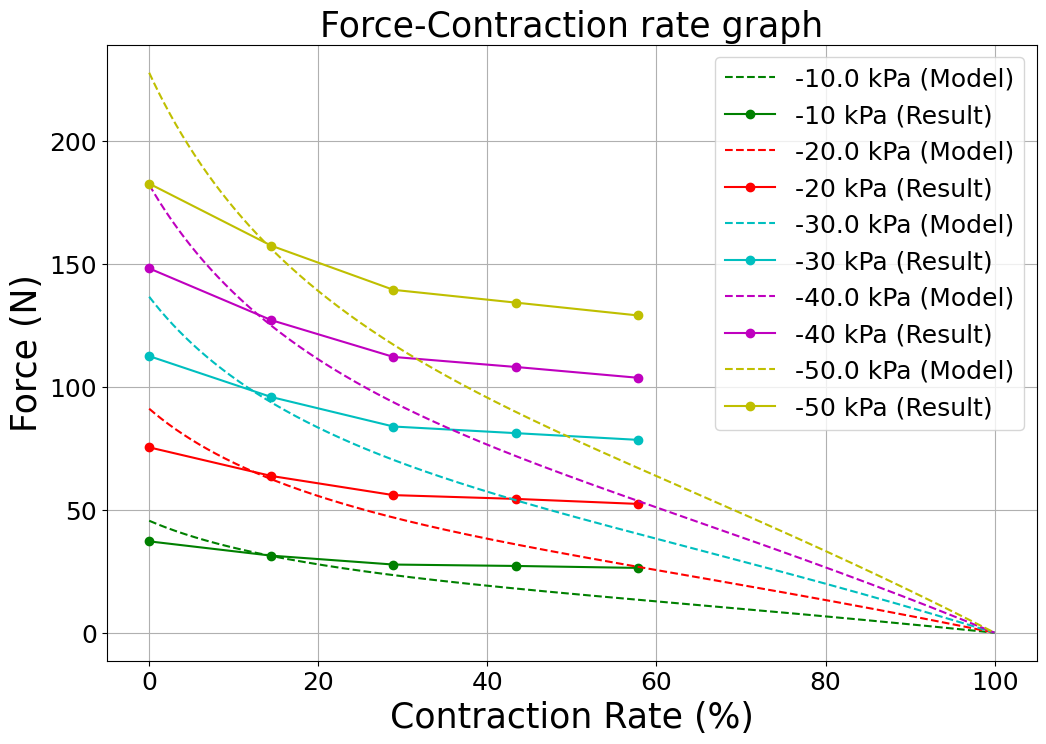

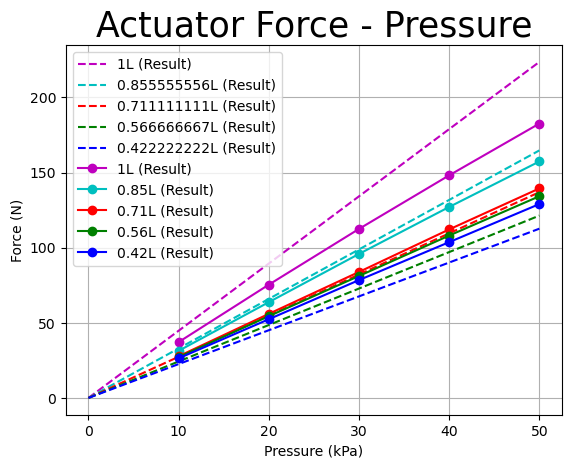

      L_total       dV/dL_t
0    0.024000  1.131502e-04
1    0.023985  1.129085e-04
2    0.023971  1.126676e-04
3    0.023956  1.124274e-04
4    0.023942  1.121878e-04
..        ...           ...
995  0.000116  4.083395e-07
996  0.000087  3.063811e-07
997  0.000058  2.043382e-07
998  0.000029  1.022112e-07
999  0.000000  0.000000e+00

[1000 rows x 2 columns]
[2.40000000e-02 2.39854619e-02 2.39708974e-02 2.39563066e-02
 2.39416895e-02 2.39270461e-02 2.39123764e-02 2.38976804e-02
 2.38829581e-02 2.38682096e-02 2.38534349e-02 2.38386340e-02
 2.38238068e-02 2.38089535e-02 2.37940740e-02 2.37791684e-02
 2.37642367e-02 2.37492788e-02 2.37342949e-02 2.37192848e-02
 2.37042487e-02 2.36891866e-02 2.36740984e-02 2.36589842e-02
 2.36438441e-02 2.36286779e-02 2.36134858e-02 2.35982677e-02
 2.35830237e-02 2.35677538e-02 2.35524580e-02 2.35371363e-02
 2.35217887e-02 2.35064153e-02 2.34910161e-02 2.34755910e-02
 2.34601402e-02 2.34446636e-02 2.34291612e-02 2.34136330e-02
 2.33980792e-02 2.33824996e-0

In [11]:
length = [1, 0.855555556, 0.711111111, 0.566666667, 0.422222222]
force_0kPa = [0, -8.526, -15.876, -21.168, -22.3538]
force_10kPa = [37.15376, 31.34236, 27.7242, 27.15188, 26.35906]
force_20kPa = [75.3865, 63.7441, 55.95604, 54.42626, 52.3859]
force_30kPa = [112.49028, 95.84792, 83.85566, 81.1636, 78.4343]
force_40kPa = [148.15836, 127.11286, 112.15414, 108.07636, 103.69086]
force_50kPa = [182.62398, 157.38996, 139.44028, 134.24922, 129.03856]

pressure = [-10, -20, -30, -40, -50]
force_100L = [37.15376, 75.3865, 112.49028, 148.15836, 182.62398]
force_85L = [31.34236, 63.7441, 95.84792, 127.11286, 157.38996]
force_71L = [27.7242, 55.95604, 83.85566, 112.15414, 139.44028]
force_56L = [27.15188, 54.42626, 81.1636, 108.07636, 134.24922]
force_42L = [26.35906, 52.3859, 78.4343, 103.69086, 129.03856]

# 데이터 역순으로 정렬
length = length[::-1]
force_0kPa = force_0kPa[::-1]
force_10kPa = force_10kPa[::-1]
force_20kPa = force_20kPa[::-1]
force_30kPa = force_30kPa[::-1]
force_40kPa = force_40kPa[::-1]
force_50kPa = force_50kPa[::-1]

# 길이를 수축률로 변환
strain = [(1 - l) * 100 for l in length]

# 초기값 설정
theta = np.linspace(np.pi/180*60, 0, 1000)
h0 = 24*10**-3
initialangle = np.pi/3
n = 8
D = 27*10**-3 #n각형의 한변의 길이
q = 10*10**-3
L0 = h0/np.sin(initialangle)
h = L0 * np.sin(theta)
An = 2*(1+2**0.5)*D**2
n_theta=np.pi*2/3

V = 2/3**0.5*An*h*np.sin(theta)-1/9*(3*D-2*q+q*np.cos(n_theta))*n*h**2*np.cos(theta)*np.sin(theta)
dV=(2/3**0.5)*An*h*np.cos(theta)-1/9*(3*D-2*q+q*np.cos(n_theta))*n*h**2*(np.cos(theta)**2-np.sin(theta)**2)
dL=L0*np.cos(theta)

# 압력과 힘 배열 선언
P = [0] * 11
F = [0] * 11
F_re = [0] * 11

# 압력과 힘 계산
for i in range(0, 11):
    P[i] = -10 * i * 10 ** 3  # 압력 값 (Pa)
    F[i] = -P[i] * dV/dL

# 실험값의 그래프를 점선과 마커로 표시
force_exp = [force_0kPa, force_10kPa, force_20kPa, force_30kPa, force_40kPa, force_50kPa]
contraction_rate = (1 - h / h[0]) * 100
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:brown', 'tab:pink', 'tab:olive']
linestyles = ['-', '--', ':', '-.', '--', '--']
markers = ['o', 'o', 'o', 'o', 'o', 'o']
plt.figure(figsize=(12, 8))
for i in range(1, 6):
    plt.plot(contraction_rate, F[i], linestyle=linestyles[1], color=colors[i], label=str(P[i] / 10 ** 3) + ' kPa (Model)')
    plt.plot(strain, force_exp[i], linestyle=linestyles[0], marker=markers[i], color=colors[i], label=str(-i * 10) + ' kPa (Result)')

print("Volume = ",V[0])


plt.xlabel('Contraction Rate (%)', fontsize=25)
plt.ylabel('Force (N)', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Force-Contraction rate graph', fontsize=25)
plt.grid(True)
plt.legend(fontsize=18)
plt.show()

F_P = [0]*5
P_linspace = np.linspace(0,-50,100)
dV_dL = [0.004473, 0.003295, 0.002739, 0.002427, 0.002253]
for i in range(0,5):
    F_P[i] = -P_linspace * dV_dL[i]*1000
    plt.plot(P_linspace,F_P[i],'--',color=colors[4-i],label=str(length[4-i])+'L (Result)')

# 추가 데이터 그래프 그리기
plt.plot(pressure, force_100L, 'o-', color=colors[4], label='1L (Result)')
plt.plot(pressure, force_85L, 'o-', color=colors[3], label='0.85L (Result)')
plt.plot(pressure, force_71L, 'o-', color=colors[2], label='0.71L (Result)')
plt.plot(pressure, force_56L, 'o-', color=colors[1], label='0.56L (Result)')
plt.plot(pressure, force_42L, 'o-', color=colors[0], label='0.42L (Result)')

# 축 레이블 및 범례 설정
plt.xlabel('Pressure (kPa)')
plt.ylabel('Force (N)')
plt.legend()

# 그래프 제목 설정
plt.title('Actuator Force - Pressure', fontsize=25)

# X축을 좌우 반전
plt.gca().invert_xaxis()

# 눈금 설정
custom_ticks = [-50, -40, -30, -20, -10, 0]  # Custom tick positions
custom_labels = [f"{abs(tick)}" for tick in custom_ticks]  # Custom tick labels (with absolute values)
plt.xticks(custom_ticks, custom_labels)

# 그래프 표시
plt.grid(True)
plt.show()

# 표 생략 기능
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

# 표 생략하기
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


# 데이터 표로 나타내기
data = {'L_total': h, 'dV/dL_t': dVdL}
table = pd.DataFrame(data)
print(table)

print(str(h))